# Lévy Flights

In cognitive science, "explore and exploit" is often modelled by Lévy flights. Explore and exploit (EE) is generally where an organism stays in one location where some resource has been found, but then randomly moves to a different source. At least that's how I understand it now. Lévy flights are used to model these dynamics because they are heavy-tailed distributions known as stable distributions--these have infinite variance! 

I'll leave those sorts of details for mathematicians, though. The goal here is to understand the basics of how to use a Lévy distribution to generate a number of unbiased flights from a signle point, and a number of flights that tend towards some coordinate due to a bias term in the random flight. 

This notebook relied heavily on the Wikipedia page [Lévy flight](https://en.wikipedia.org/wiki/L%C3%A9vy_flight).

## The Lévy and Cauchy distributions

Before using these random flights, let's get a look at the Lévy distribution, from which the magnitude of steps of each agent are drawn on a given timestep. 

We'll be using SciPy's implementation of the Lévy process for any $\alpha$ and $\beta$, with $\alpha=1$ and $\beta=0$, corresponding to a Cauchy process, and resulting in a "Cauchy flight" when used for generating movement in space. 

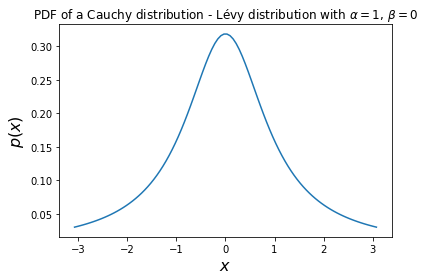

In [202]:
# Adapted from 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levy_stable.html#scipy.stats.levy_stable

import warnings; warnings.simplefilter('ignore')  # Unimportant hiding of matplotlib warnings.

# Use matplotlib for simple, publication-quality plots.
import matplotlib.pyplot as plt

from scipy.stats import levy_stable

# Setting for a "Cauchy" flight 
# with these parameters.
alpha = 1
beta = 0

# Plot parameters. 
# PPF is not actually the inverse 
# of the PDF, but the CDF. Not totally sure how to explain.
xlim = (
    levy_stable.ppf(0.1, alpha, beta), 
    levy_stable.ppf(0.9, alpha, beta)
)

# Number of grid cells to use for plot.
n_grid_cells = 100
        
# Define x-grid.
x = np.linspace(*xlim, n_grid_cells)

# Calculate PDF values on the x-grid. 
pdf = levy_stable.pdf(x, alpha, beta)

# Plot the distribution.
fig, ax = plt.subplots(1, 1)
ax.plot(x, pdf);
ax.set_title(r'PDF of a Cauchy distribution - Lévy distribution with $\alpha=1$, $\beta=0$', size=12)
ax.set_xlabel(r'$x$', size=16)
ax.set_ylabel(r'$p(x)$', size=16);
    

## Building a Cauchy flight

A Cauchy flight is the process where an "agent" moves around a space at random. The randomness has structure. It can be defined by defining two random draws at every timestep. One draw is from a uniform distribution from 0 to 2$\pi$, which is the direction the agent turns on a given timestep.  The other draw is from the Cauchy distribution, which becomes the step size in the direction drawn previously. 

Simulating bird #1
Simulating bird #2
Simulating bird #3
Simulating bird #4
Simulating bird #5
Simulating bird #6
Simulating bird #7
Simulating bird #8
Simulating bird #9
Simulating bird #10


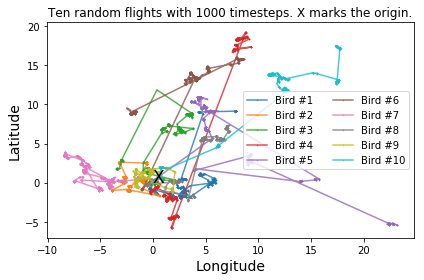

In [300]:
# Agent-based model of "bird" foraging.
class Bird:
    
    def __init__(self, step_size=1.0, start_point=(0, 0), alpha=1, beta=0):
        self.current_location = start_point
        self.lévy_rv = levy_stable.rvs
        self.heading = np.random.uniform(high=2*np.pi)
        self.visited_locations = [start_point]
        self.step_size = step_size
        
    def fly(self):      
        cur_x, cur_y = self.current_location
        
        # Magnitude and direction of next flight step.
#         self.heading = np.random.uniform(low=-np.pi/4, high=np.pi/45)
        self.heading = np.random.uniform(high=np.pi * 2)
        delta_z = np.exp(1j * self.heading) * self.step_size * self.lévy_rv(alpha, beta)
        
        next_location = (cur_x + np.real(delta_z), cur_y + np.imag(delta_z))

        self.current_location = next_location
        self.visited_locations.append(self.current_location)
        

for bird_idx in range(10):
    print("Simulating bird #{}".format(bird_idx + 1))
    n_flights = 1000
    bird = Bird(step_size=0.01)
    for _ in range(n_flights):
        bird.fly()

    # Make x and y arrays for each individual component of bird location.
    visited_locations = np.array(bird.visited_locations)
    x = visited_locations[:, 0]
    y = visited_locations[:, 1]
    plt.plot(x, y, '.-', ms=1, alpha=0.8, label='Bird #{}'.format(bird_idx + 1))
    

plt.legend(ncol=2)
plt.xlabel('Longitude', size=14)
plt.ylabel('Latitude', size=14)

plt.text(0, 0, 'X', size=17)
plt.title('Ten random flights with 1000 timesteps. X marks the origin.')
plt.savefig('/Users/mt/Desktop/Levy.pdf', dpi=500)

## References

https://www.pnas.org/content/pnas/early/2014/07/11/1405966111.full.pdf